# In-class exercises Class 17

---
Today, we will start learning how to fit data and extract parameters...


We will keep it simple and won't use any error bars in the first example.  We will have stat errors when we use histograms, and will incorporate errors in the first example on Wed.  Data always needs errors, but we will ignore that for now...



First, let's import the tools that we will need:

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy


## Fitting

Let's start by making a simple dataset.  We will use the example we have used in class of an object falling.    


Text(0, 0.5, 'v (m/s)')

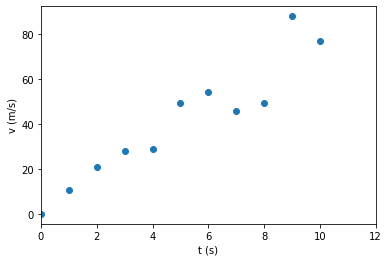

In [2]:

# Seed the random number generator for reproducibility
#np.random.seed(2)

x_data = np.linspace(0, 10, num=11)

#Here we are smearing our values with Gaussian random number y(1+-.2)
y_data = 9.8*x_data*(1+np.random.normal(size=11)/5.0) 


# And plot it
plt.figure(figsize=(6, 4))
plt.scatter(x_data, y_data)
plt.xlim(xmax = 12.0, xmin = 0)
plt.xlabel("t (s)")
plt.ylabel("v (m/s)")


Again, this is a similar dataset to the example one in class:  dropping an object.   Let's see how we could fit it to a line and extract the best fit parameters.  For fitting in this class, we will start with the "optimize" method from the scipy module.

First, we also need to define our function.  Our data looks linear (y=ax+b, so let's try that first and see what we get..

In [3]:
def test_func(x, a, b):
    return a*x+b 

Here is the basic use of the "optimize" function (look at the documentation!):

In [4]:
params, params_covariance = scipy.optimize.curve_fit(test_func, x_data, y_data,
                                               p0=[10, 0])

#print(params)
print('y = %.5f * x + %.5f' % (params[0], params[1]))
#print(params_covariance)

y = 7.64209 * x + 2.82249


Great, we got the best-fit parameters and wrote them to the screen (we will learn more about the covariance matrix later).  Let's plot the resulting best fit line on the data and see how it looks.

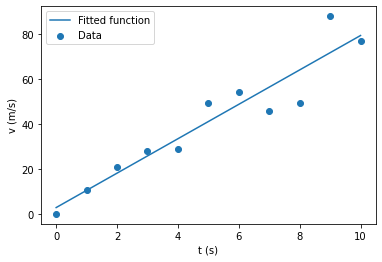

In [5]:
plt.figure(figsize=(6, 4))
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, test_func(x_data, params[0], params[1]),
         label='Fitted function')

plt.legend(loc='best')
plt.xlabel("t (s)")
plt.ylabel("v (m/s)")
plt.show()

## **EXERCISE 1**:  
<span style="color:red"> What documentation are you looking at for 'curve_fit'  ?  </red>

Include the link for documentation here.  

## **EXERCISE 2**:  
<span style="color:red"> make a new function where you fix the y-intercept of your function to zero.  That is, your new function will be a line with only one parameter - the slope.  Make this new function, and fit the the data.  How did the value of the best fit slope change?  It should come closer to the input value of 9.8...   </red>

In [6]:
#Put your code here

In exercise 1, you are constraining the fit based on some prior knowledge.  We know that the object has exactly zero velocity at t=0.  If we provide such constraints, our minimization method will work more efficiently and come to a better answer.  Here is what I did for exercise 1:

In [7]:
def test_func2(x, a):
    return a*x

params, params_covariance = scipy.optimize.curve_fit(test_func2, x_data, y_data,
                                               p0=[10])

print(params)
print('y = %.5f * x' % (params[0]))

[8.04530444]
y = 8.04530 * x


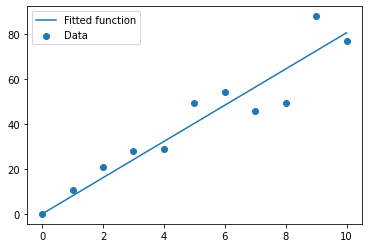

In [8]:
plt.figure(figsize=(6, 4))
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, test_func2(x_data, params[0]),
         label='Fitted function')

plt.legend(loc='best')

plt.show()

By constraining the function used in the fit based on our knowledge, we got a better model of our data.  This is part of the game when trying to find the best model, and to extract parameters with small uncertainties...  

## The Gaussian

  Due to the [Central Limit Theorom](https://en.wikipedia.org/wiki/Central_limit_theorem),  the Gaussian is probably the most common function used to fit data.  
  
 Gauss what?  Scipy comes with a method for fitting to a Gaussian normal distribution!!  



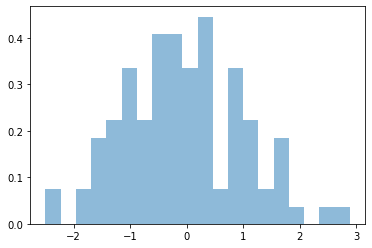

In [9]:
data = np.random.normal(0, 1, 100)  #Draw some random data from the normal distribution
bin_values, bins, myart = plt.hist(data, 20, density=1, alpha=0.5)  #Fill a histogram and draw it

Does that look Gaussian?  It is, but it has limited statistics.  Now, let's fit this histogram to a Gaussian, and see how it looks:



 The best fit parameters are:  mu=-0.064  sigma= 1.0 




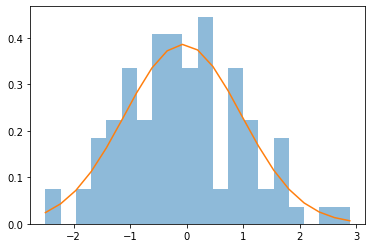

In [10]:
mu, sigma = scipy.stats.norm.fit(data)

print(f"\n\n The best fit parameters are:  mu={mu:4.2}  sigma={sigma:4.2} \n\n")

best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)
bin_values, bins, myart = plt.hist(data, 20, density=1, alpha=0.5)
plt.plot(bins, best_fit_line)

## **EXERCISE 3**:  
<span style="color:red">  Extract the parameters of the mean and sigma for the fit.     </red>

## **EXERCISE 2**:  
<span style="color:red">  Redo the example above, but with 10,000 entries in your histogram.  What changes?     </red>

In [11]:
#Put your code here

Put your comments on what changes here...  

## Playing with the Iris data

Recall how we could load/plot the Iris dataset

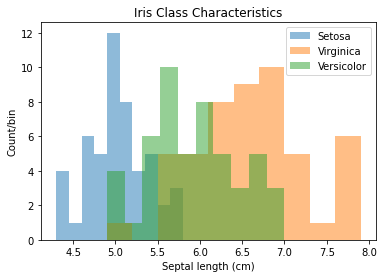

In [132]:
np_list_virginica= np.loadtxt("data/Iris-virginica.dat")
np_list_versicolor= np.loadtxt("data/Iris-versicolor.dat")
np_list_setosa= np.loadtxt("data/Iris-setosa.dat")

plt.figure()  #Need this before we are able to save a plot to file!!!

hist_setosa=plt.hist(np_list_setosa[:,0],label="Setosa",alpha=.5)
hist_virginica=plt.hist(np_list_virginica[:,0],label="Virginica",alpha=.5)
hist_versicolor=plt.hist(np_list_versicolor[:,0],label="Versicolor",alpha=.5)
# Adding Title
plt.legend()
plt.title("Iris Class Characteristics")
  
# Labeling the axes
plt.xlabel("Septal length (cm)")
plt.ylabel("Count/bin")
 
plt.savefig('septal_length.png')


#print(np_list_virginica)

These don't look very Gaussian, but there is limited statistics.  If we believe that the variations within a species are largely statistical, we might assume that if we measured enough properties of enough samples, these distributions might approach a Gaussian.  Let's fit one to a Gaussian and see what it looks like. 

Text(0.5, 1.0, 'Setosa')

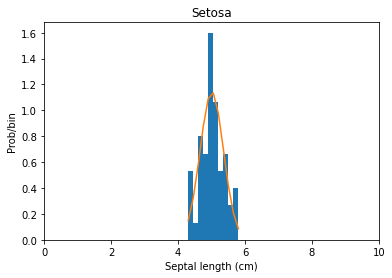

In [133]:
_, bins, _ = plt.hist(np_list_setosa[:,0],label="Setosa",density=True)  



#It is easier if we normalize the histogram to 1 first... 
#Density=True does that for us

mu, sigma = scipy.stats.norm.fit(np_list_setosa[:,0])
best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)
plt.xlabel("Septal length (cm)")
plt.ylabel("Prob/bin")
plt.plot(bins, best_fit_line)
plt.xlim(xmax = 10.0, xmin = 0)
plt.title("Setosa")

That actually looks pretty good.  

## **EXERCISE 3**:  
<span style="color:red">  Fit the other Iris classes Septal lengths to Gaussian.  Compare the Gaussian means and sigmas.     </red>

In [122]:
#Put your code here

Compare the Gaussian means and sigmas here. 